In [104]:
with open("/mnt/hgfs/vmware_ubuntu_sf/ro_uart_idle_921600.log", 'rb') as myfile:
    lines = myfile.readlines()
with open("/mnt/hgfs/vmware_ubuntu_sf/ro_uart_idle_921600.log", 'wb') as myfile:
    myfile.writelines(lines[1:])
        

In [1]:
with open("/home/srchand/idle_hex.log", 'rb') as myfile:
    full_file = bytearray()
    while(byte := myfile.read(1)):
        full_file.append(int.from_bytes(byte,"big"))

In [4]:
extracted_vals = full_file.split(b'\r\n')
# extracted_vals = extracted_vals[1:]
ro_values = []
for val in extracted_vals:
    if(len(val) >= 2 and len(val) <= 5):
        if(val[0] == 10 and len(val) > 3):
            val = val[1:]
    int_val = int.from_bytes(val,"big")
    if(int_val <= 2097151):
        ro_values.append(int.from_bytes(val,"big"))

ro_values = ro_values[:-1]

In [7]:
full_file

bytearray(b'0d 0a 04 ee 1c 0d 0a 0d ee f4 0d 0a 02 ee 8c 0d 0a 0b ed ac 0d 0a 00 ed bc 0d 0a 09 ed b8 0d 0a 12 ed 78 0d 0a 07 ec d4 0d 0a 10 ec 80 0d 0a 05 ec 90 0d 0a 0e ed 04 0d 0a 03 ee 18 0d 0a 0c ec b2 0d 0a 01 ed 98 0d 0a 0a ed a8 0d 0a 13 ed e0 0d 0a 08 ee 2c 0d 0a 11 ee 14 0d 0a 06 ee 9c 0d 0a 0f ee 5c 0d 0a 04 ed a4 0d 0a 0d ed c8 0d 0a 02 ed 88 0d 0a 0b ec 58 0d 0a 00 eb dc 0d 0a 09 eb 88 0d 0a 12 eb 70 0d 0a 07 eb 30 0d 0a 10 ea 50 0d 0a 05 ea 24 0d 0a 0e ea 84 0d 0a 03 ea 58 0d 0a 0c ea 2c 0d 0a 01 ea b4 0d 0a 0a ea 46 0d 0a 13 ea 20 0d 0a 08 ea 08 0d 0a 11 e9 8c 0d 0a 06 e9 10 0d 0a 0f e8 80 0d 0a 04 e8 54 0d 0a 0d e8 b4 0d 0a 02 e8 c4 0d 0a 0b e8 70 0d 0a 00 e7 e1 0d 0a 09 e7 a0 0d 0a 12 e7 74 0d 0a 07 e7 34 0d 0a 10 e7 6c 0d 0a 05 e7 54 0d 0a 0e e6 b0 0d 0a 03 e6 a4 0d 0a 0c e5 cc 0d 0a 01 e5 8c 0d 0a 0a e5 ec 0d 0a 13 e6 4c 0d 0a 08 e5 44 0d 0a 11 e5 54 0d 0a 06 e5 64 0d 0a 0f e5 2f 0d 0a 04 e4 e4 0d 0a 0d e4 cc 0d 0a 02 e4 dc 0d 0a 0b e5 00 0d 0a 00 e4 ac 0d 0a 09 e4 a

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame(ro_values)

In [5]:
df.plot(subplots=True, figsize=(40,20))

TypeError: no numeric data to plot

In [96]:
from pandas.plotting import autocorrelation_plot
import seaborn as sns

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

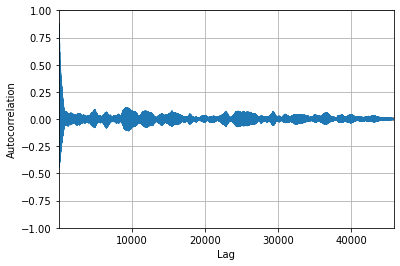

In [97]:
autocorrelation_plot(df)

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose

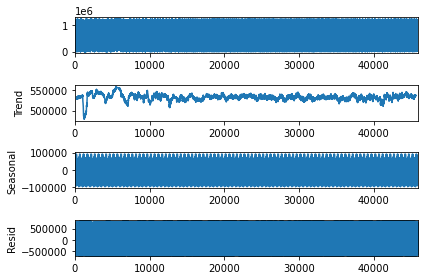

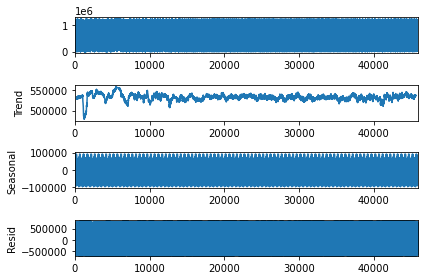

In [99]:
decompose = seasonal_decompose(df,model='additive', period=500)
decompose.plot()

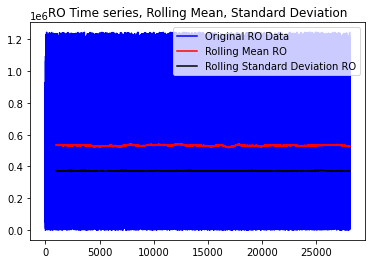

In [49]:
rolling_mean = df.rolling(1000).mean()
rolling_std = df.rolling(1000).std()

plt.plot(df, color="blue",label="Original RO Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean RO")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation RO")
plt.title("RO Time series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")